In [24]:
# 라이브러리
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
# data load
df = pd.read_csv('./dataset/global_tech_salary.txt', delimiter=',')

In [3]:
print(df.head())
print(df.info())
print(df.describe())


   work_year experience_level employment_type                  job_title  \
0       2023               MI              FT               Data Analyst   
1       2023               MI              FT               Data Analyst   
2       2024               MI              FT  Machine Learning Engineer   
3       2024               SE              FT             Data Scientist   
4       2023               MI              FT          Research Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  165000             USD         165000                 AU             0   
1   70000             USD          70000                 US           100   
2   85000             EUR          94444                 IE           100   
3   92700             USD          92700                 US             0   
4  150000             USD         150000                 US             0   

  company_location company_size  
0               AU            M  
1           

In [4]:
# 중복값 제거
df = df.drop_duplicates()

# 결측값 제거
df = df.dropna()

# one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [6]:
df.columns

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio',
       'experience_level_EX', 'experience_level_MI', 'experience_level_SE',
       'employment_type_FL', 'employment_type_FT', 'employment_type_PT',
       ...
       'company_location_SG', 'company_location_SI', 'company_location_TH',
       'company_location_TR', 'company_location_UA', 'company_location_US',
       'company_location_VN', 'company_location_ZA', 'company_size_M',
       'company_size_S'],
      dtype='object', length=258)

In [7]:
# 원본 데이터에서 'salary_currency', 'salary 제거하고 새로운 데이터 사용
df = df.drop(columns=['salary'])

In [8]:
X = df.drop(columns=['salary_in_usd'])  # 종속 변수 제외한 나머지를 독립 변수로 사용
y = df['salary_in_usd']  # 종속 변수 설정

### 선형회귀

In [38]:
# 데이터 분리 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# 모델 초기화 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# 예측
y_pred = model.predict(X_test)


In [41]:
# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 2689578370.8358274
R-squared (R²): 0.3374337131059293


In [42]:
# 회귀 계수 확인
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


                 Feature   Coefficient
0              work_year   4619.014806
1           remote_ratio    -23.278152
2    experience_level_EX  61238.138258
3    experience_level_MI  18813.754563
4    experience_level_SE  44065.726017
..                   ...           ...
251  company_location_US  33963.720808
252  company_location_VN   6167.232570
253  company_location_ZA  14481.272987
254       company_size_M  -2085.072117
255       company_size_S -33876.921707

[256 rows x 2 columns]


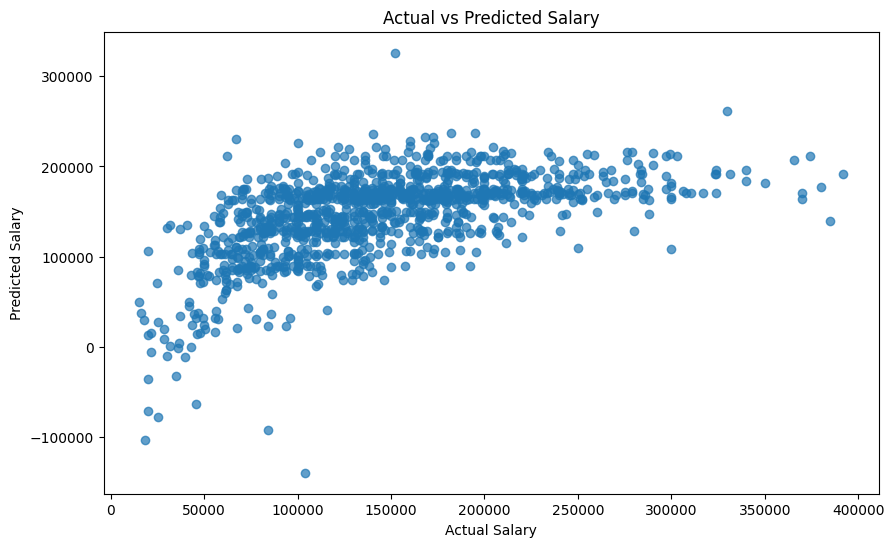

In [37]:
# 시각화 (예: 실제 값 vs 예측 값)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

### 랜덤포레스트

In [17]:
# 랜덤 포레스트 모델 초기화 및 훈련
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# 예측
y_pred = rf_model.predict(X_test)

In [19]:
# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 2900707070.456778
R-squared (R²): 0.2854230485045647


In [20]:
# 중요 변수 시각화
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


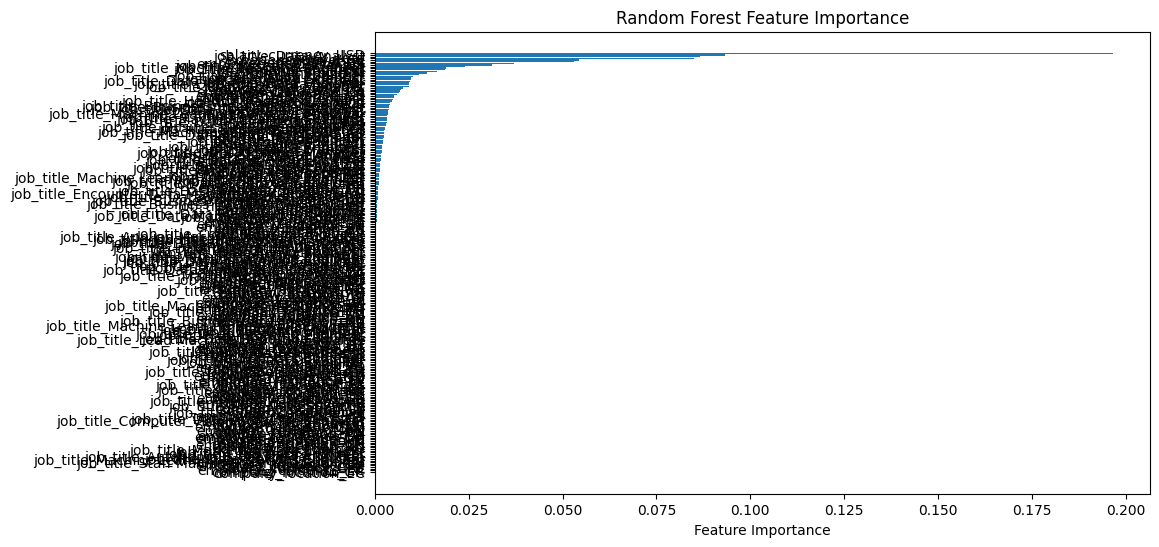

In [21]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

### Gradient Boosting

In [25]:
# 데이터 분리 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Gradient Boosting 모델 초기화 및 학습
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [27]:
# 예측
y_pred = gb_model.predict(X_test)

In [28]:
# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 2646217381.4358873
R-squared (R²): 0.34811550994602036


In [29]:
# 변수 중요도 시각화
importances = gb_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

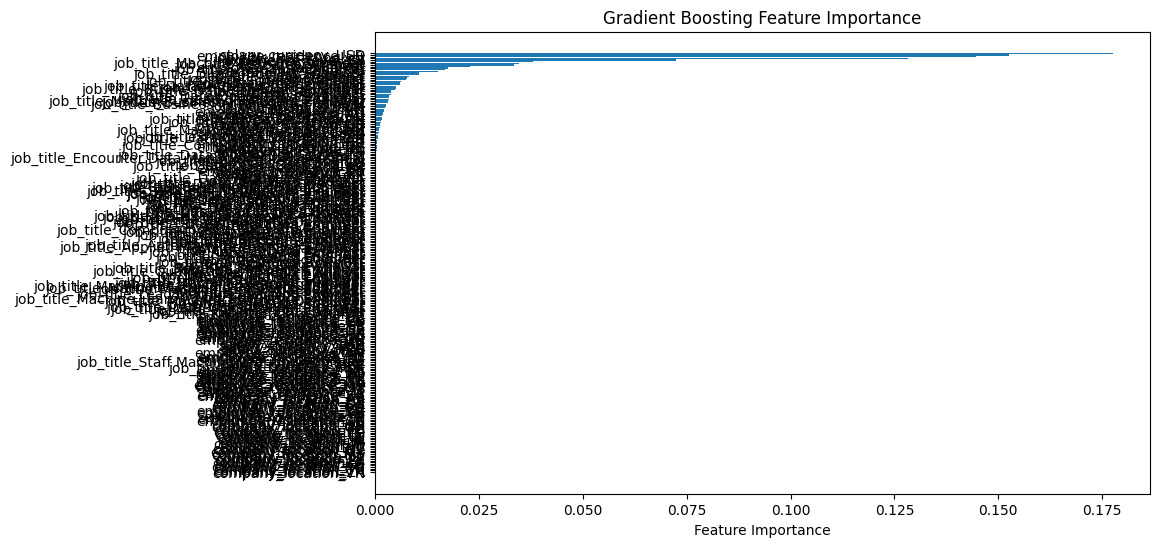

In [30]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting Feature Importance')
plt.gca().invert_yaxis()
plt.show()